In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Reshape
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import SGD,Adam

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [16]:
file_path = 'KFS_Processed.csv'
data = pd.read_csv(file_path)

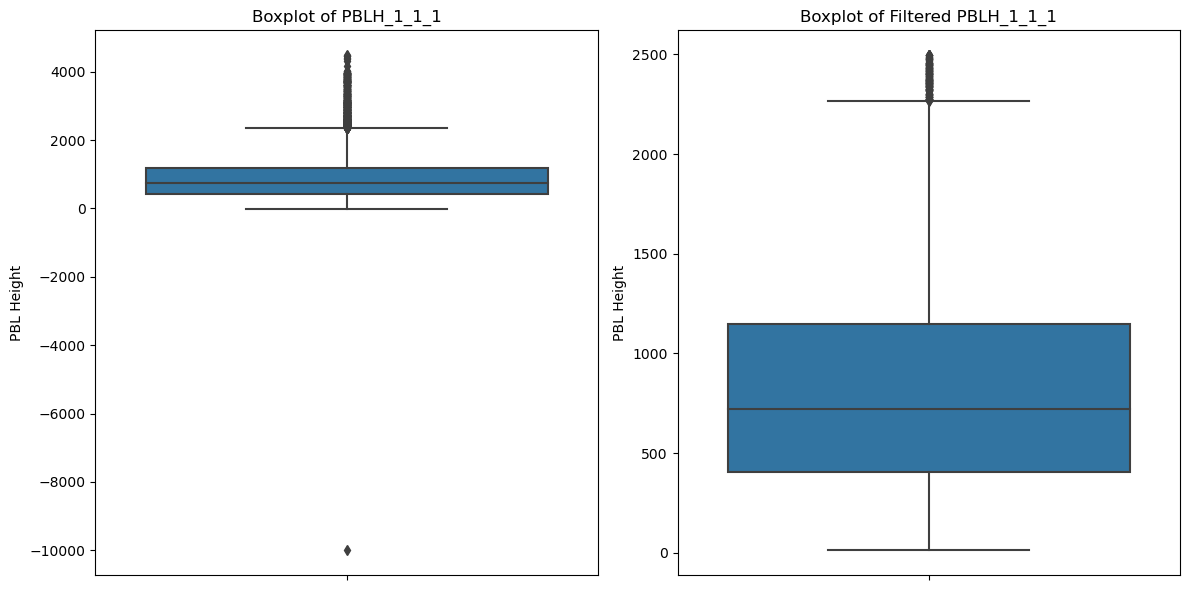

In [36]:
# Extract the target column PBLH_1_1_1
pblh_data = data['PBLH_1_1_1']
filtered_data = data[(data['PBLH_1_1_1'] >= 0) & (data['PBLH_1_1_1'] <= 2500)]

plt.figure(figsize=(12, 6))

# Create a boxplot for the original PBLH_1_1_1 data
plt.subplot(1, 2, 1)
sns.boxplot(y=pblh_data)
plt.title('Boxplot of PBLH_1_1_1')
plt.ylabel('PBL Height')

# Create a boxplot for the filtered PBLH_1_1_1 data
plt.subplot(1, 2, 2)
sns.boxplot(y=filtered_data['PBLH_1_1_1'])
plt.title('Boxplot of Filtered PBLH_1_1_1')
plt.ylabel('PBL Height')

plt.tight_layout()
plt.show()

In [18]:
columns_1_1_1 = [col for col in data.columns if col.endswith('_1_1_1')]

data_0 = filtered_data[columns_1_1_1]
'''
# Standardize the features
scaler = StandardScaler()
data_selected[columns_1_1_1] = scaler.fit_transform(data_selected[columns_1_1_1])
'''
data_0

,WD_1_1_1,USTAR_1_1_1,TA_1_1_1,WS_1_1_1,NEE_PI_1_1_1,NEE_PI_F_1_1_1,SC_1_1_1,H_1_1_1,SH_1_1_1,LE_1_1_1,...,RH_PI_F_1_1_1,PPFD_OUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,SW_OUT_PI_F_1_1_1,LW_IN_PI_F_1_1_1,LW_OUT_PI_F_1_1_1,H2O_PI_F_1_1_1,PBLH_1_1_1,RECO_PI_1_1_1,TAU_1_1_1
115,340.573160,0.54125,-4.38741,0.552410,1.50490,1.504866,-0.0371,30.9740,0.886316,-5.3829,...,56.2915,NaN,57.8750,NaN,NaN,NaN,NaN,636.69,0.011511,NaN
116,326.653186,0.50486,-4.63626,1.045335,1.42350,1.423495,-0.0583,29.2180,1.565247,-4.4541,...,57.7003,NaN,83.3660,NaN,NaN,NaN,NaN,705.85,0.011141,NaN
117,11.384379,0.58121,-4.83508,0.492291,1.73950,1.739478,-0.0214,35.9760,1.944994,-5.7841,...,58.9988,NaN,104.3200,NaN,NaN,NaN,NaN,774.78,0.010852,NaN
118,39.722272,0.51958,-5.05597,0.247882,1.17860,1.178603,-0.0377,41.3730,1.485689,-5.5117,...,60.1288,NaN,117.0300,NaN,NaN,NaN,NaN,800.35,0.010536,NaN
119,358.509814,0.55559,-5.35906,0.891055,1.44540,1.445440,0.0554,47.0620,1.272868,-5.5401,...,62.1518,NaN,125.2700,NaN,NaN,NaN,NaN,774.79,0.010112,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34986,165.240000,0.40736,5.18460,4.838000,0.68572,0.685720,0.0748,-2.5022,-0.033900,17.5800,...,76.5266,-0.115890,7.1564,NaN,NaN,NaN,8.97741,326.18,NaN,0.162761
34987,159.320000,0.35826,5.18540,4.413700,0.25228,0.252280,0.0765,-1.7611,0.001740,11.5030,...,76.5266,-0.112070,7.1934,NaN,NaN,NaN,9.16183,332.81,NaN,0.124153
34988,155.200000,0.36557,5.14860,4.207700,0.48288,0.482880,0.0800,-2.1398,-0.074900,11.8260,...,76.5266,-0.102820,5.2289,NaN,NaN,NaN,9.40484,336.24,NaN,0.132064
34989,156.580000,0.30440,5.23400,3.460400,0.36342,0.363420,0.0610,-3.7005,0.173540,8.7687,...,76.5266,-0.029810,3.0989,NaN,NaN,NaN,9.55641,338.62,NaN,0.077408


In [19]:
#correlation check to use the most correlated variables

# Drop out columns with more than half NANs
threshold = 0.5 * len(data_0)
columns_to_keep = [col for col in data_0.columns if data_0[col].isna().sum() <= threshold or col == 'PBLH_1_1_1']
data_filtered = data_0[columns_to_keep]

deleted_columns = [col for col in data_0.columns if data_0[col].isna().sum() > threshold and col != 'PBLH_1_1_1']

# Print the deleted columns
print("Columns deleted due to exceeding NaN threshold:")
print(deleted_columns)

if 'PBLH_1_1_1' not in data_filtered.columns:
    raise ValueError("PBLH_1_1_1 was dropped during filtering.")


data_filtered = data_filtered.dropna()

correlation_matrix = data_filtered.corr()

correlation_with_pblh = correlation_matrix['PBLH_1_1_1'].drop('PBLH_1_1_1')

# Sort the features by absolute value of their correlation coefficients
filtered_features = correlation_with_pblh[correlation_with_pblh.abs() > 0.2]

selected_features = filtered_features.index.tolist()
print("Features with correlation absolute value above 0.2 to PBLH_1_1_1:")
for feature, corr in filtered_features.items():
    print(f"{feature}: {corr}")

selected_columns = selected_features + ['PBLH_1_1_1']
print(data_filtered[selected_columns])

data_selected = data_filtered[selected_columns].dropna()
features = data_selected[selected_features]
target = data_selected['PBLH_1_1_1']

Columns deleted due to exceeding NaN threshold:
['PPFD_IN_1_1_1', 'RECO_PI_F_1_1_1', 'GPP_PI_F_1_1_1', 'SWC_1_1_1', 'WD_PI_F_1_1_1', 'WS_PI_F_1_1_1', 'SC_PI_F_1_1_1', 'SH_PI_F_1_1_1', 'SLE_PI_F_1_1_1', 'PA_PI_F_1_1_1', 'CO2_PI_F_1_1_1', 'PPFD_OUT_PI_F_1_1_1', 'SW_OUT_PI_F_1_1_1', 'LW_IN_PI_F_1_1_1', 'LW_OUT_PI_F_1_1_1', 'H2O_PI_F_1_1_1', 'TAU_1_1_1']
Features with correlation absolute value above 0.2 to PBLH_1_1_1:
USTAR_1_1_1: 0.28078772210433517
TA_1_1_1: 0.25347481492691465
NEE_PI_F_1_1_1: -0.21283248739427732
H_1_1_1: 0.23595678404332468
LE_1_1_1: 0.3306495352008221
NETRAD_1_1_1: 0.29073355037046394
SW_IN_1_1_1: 0.28262704363543045
SW_OUT_1_1_1: 0.23133736500871438
LW_OUT_1_1_1: 0.26678897514336314
TA_PI_F_1_1_1: 0.2534748179734207
H_PI_F_1_1_1: 0.23595682277808736
LE_PI_F_1_1_1: 0.3306502316157136
SW_IN_PI_F_1_1_1: 0.28262704363543045
GPP_PI_1_1_1: 0.23357330130833334
NETRAD_PI_F_1_1_1: 0.29073355037046394
       USTAR_1_1_1  TA_1_1_1  NEE_PI_F_1_1_1   H_1_1_1   LE_1_1_1  \
951   

In [50]:
## Recurrent NN with 8 hidden layers. epoch 50, batch size 32, optimizer adam.

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Reshape the features to be 3D for RNN input (samples, timesteps, features)
features_reshaped = features_normalized.reshape((features_normalized.shape[0], 1, features_normalized.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.2, random_state=42)
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(1, 15), return_sequences=True))
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(32, activation='relu', return_sequences=True))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)
print(history.history)
predictions = model.predict(X_test)

## Test loss too high. appliced cross-validation and hyperparameter tuning.

Epoch 1/50


c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 991415.2500 - val_loss: 375673.9375
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 328852.7500 - val_loss: 289088.5625
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274064.7188 - val_loss: 258865.2188
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 219960.0625 - val_loss: 244498.8906
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 224590.2656 - val_loss: 235095.8125
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 209002.8281 - val_loss: 239192.2812
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 201337.7969 - val_loss: 235242.3906
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189125.1406 - val_loss: 236847.9688
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 191872.6094 - val_loss: 213982.1094
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 198476.9844 - val_loss: 214116.4844
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182575.500

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error: 136812.62716629298
Mean Absolute Error: 288.95927322991685


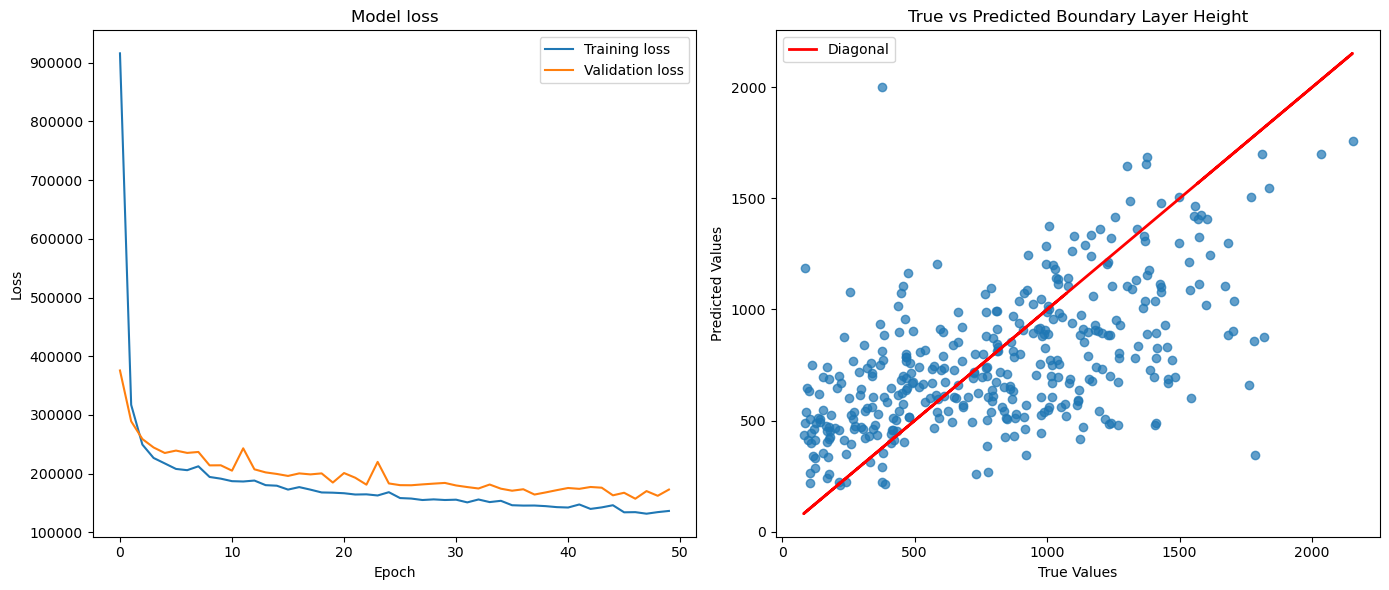

In [51]:
# Predicting boundary layer height with simple RNN
predictions = model.predict(X_test)
predictions = np.clip(predictions, 0, 2000)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Boundary Layer Height')

plt.plot(y_test, y_test, color='red', linewidth=2, label='Diagonal')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
## with k-fold and hyperparameter
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Reshape the features to be 3D for RNN input (samples, timesteps, features)
features_reshaped = features_normalized.reshape((features_normalized.shape[0], 1, features_normalized.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.2, random_state=42)

def create_model():
    model = Sequential()
    model.add(SimpleRNN(128, activation='relu', input_shape=(1, 15), return_sequences=True))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(SimpleRNN(32, activation='relu', return_sequences=True))
    model.add(SimpleRNN(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, val_index in kf.split(features_reshaped):
    X_train_cv, X_val_cv = features_reshaped[train_index], features_reshaped[val_index]
    y_train_cv, y_val_cv = target.iloc[train_index], target.iloc[val_index]

    model = create_model()
    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val_cv)
    mse = mean_squared_error(y_val_cv, y_pred_val)
    mse_scores.append(mse)

print(f'Mean Cross-Validation MSE: {np.mean(mse_scores)}')

final_model = create_model()
final_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
test_loss = final_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Cross-Validation MSE: 160593.15085109952
Epoch 1/50


c:\Users\Administratior\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 979970.3125 - val_loss: 437419.3750
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 348571.2812 - val_loss: 281107.9375
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250477.0156 - val_loss: 251922.0312
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 224951.0938 - val_loss: 242078.7812
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 213337.1875 - val_loss: 236173.2656
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 201739.2500 - val_loss: 224167.5781
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 211471.1719 - val_loss: 217466.7031
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 205713.2031 - val_loss: 211156.0000
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 186995.6250 - val_loss: 212503.0156
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192241.8906 - val_loss: 203519.5781
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176151.718

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error: 96135.19138496048
Mean Absolute Error: 244.00627756881713


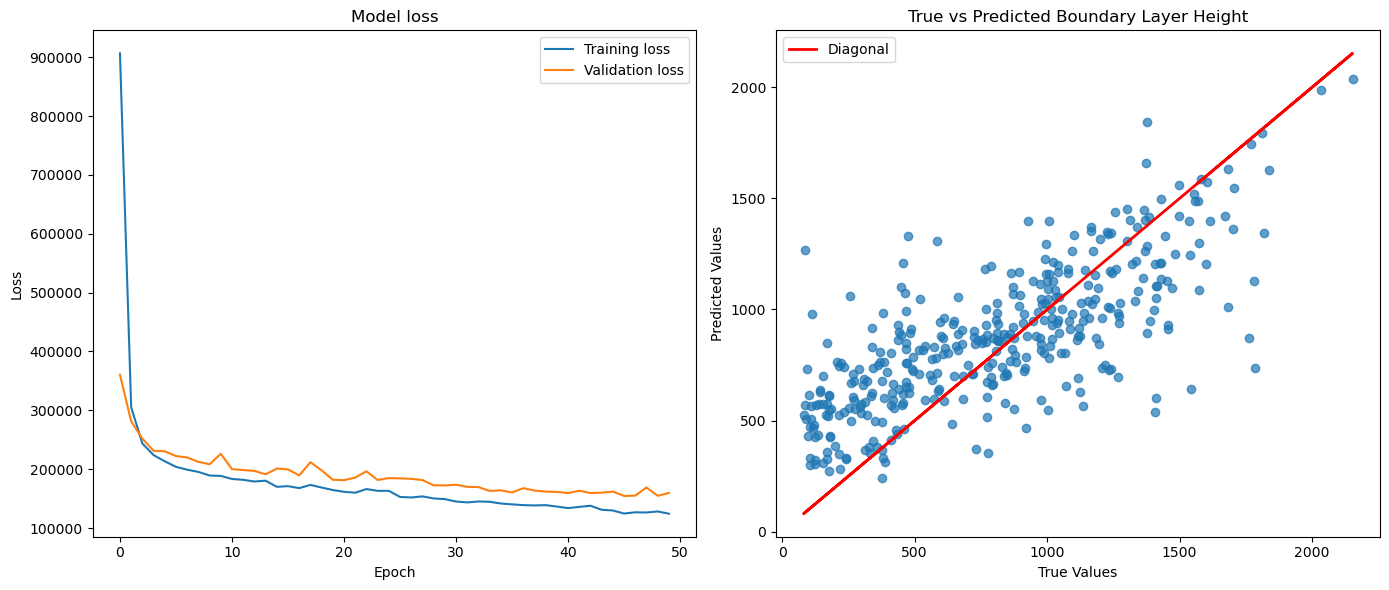

In [41]:
# Predicting boundary layer height with k-fold and hyperparameter tuning
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Boundary Layer Height')

plt.plot(y_test, y_test, color='red', linewidth=2, label='Diagonal')
plt.legend()

plt.tight_layout()
plt.show()

Mean Squared Error: 195320.26630641334
R-squared: 0.19066517597884136
Mean Absolute Error: 358.6322016855603
Coefficients of the linear regression model:
USTAR_1_1_1          6.340211e+02
TA_1_1_1            -6.551642e+05
NEE_PI_F_1_1_1      -2.691181e+00
H_1_1_1              3.219240e+02
LE_1_1_1            -1.195802e+04
NETRAD_1_1_1         8.049881e+12
SW_IN_1_1_1          3.511142e+13
SW_OUT_1_1_1         4.875229e-01
LW_OUT_1_1_1         7.635238e-01
TA_PI_F_1_1_1        6.551723e+05
H_PI_F_1_1_1        -3.224098e+02
LE_PI_F_1_1_1        1.196081e+04
SW_IN_PI_F_1_1_1    -3.511142e+13
GPP_PI_1_1_1        -2.404520e+01
NETRAD_PI_F_1_1_1   -8.049881e+12
dtype: float64


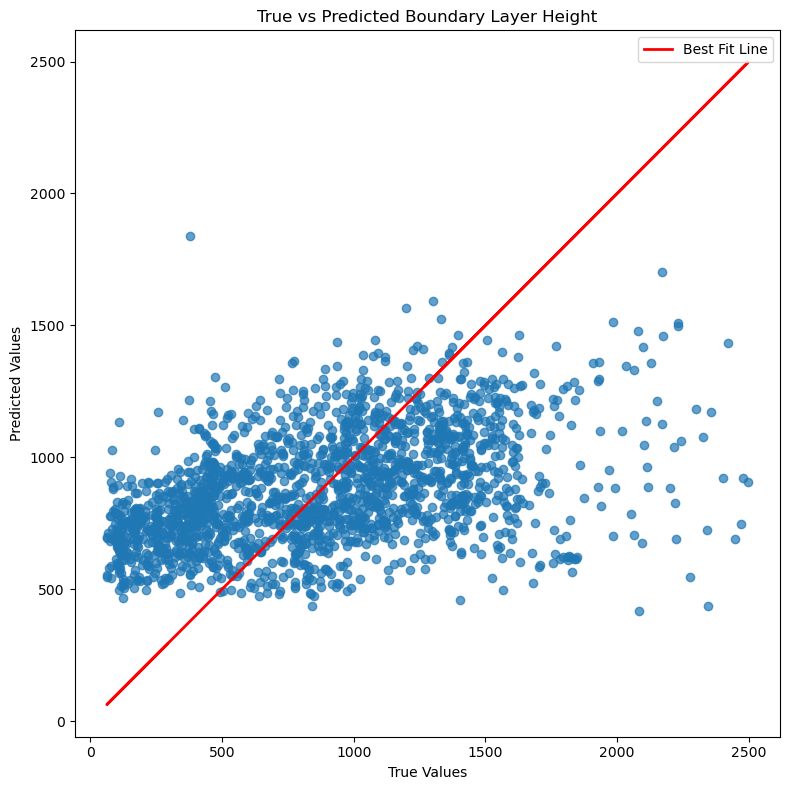

In [49]:
#try a simple model see if it works better
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(features, target)

predictions = model.predict(features)

mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

mae = mean_absolute_error(target, predictions)
print(f'Mean Absolute Error: {mae}')

coefficients = pd.Series(model.coef_, index=selected_features)
print("Coefficients of the linear regression model:")
print(coefficients)

# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(target, predictions, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Boundary Layer Height')

# Plot the line fit
plt.plot(target, target, color='red', linewidth=2, label='Best Fit Line')
plt.legend()


plt.tight_layout()
plt.show()

# OK much worse than neural network